Hamilton's win rate from pole: 59.22%
Hamilton's performance starting outside the top 3:
  - Total starts: 103
  - Wins: 8
  - Podium finishes: 33
  - Average finish: 6.75


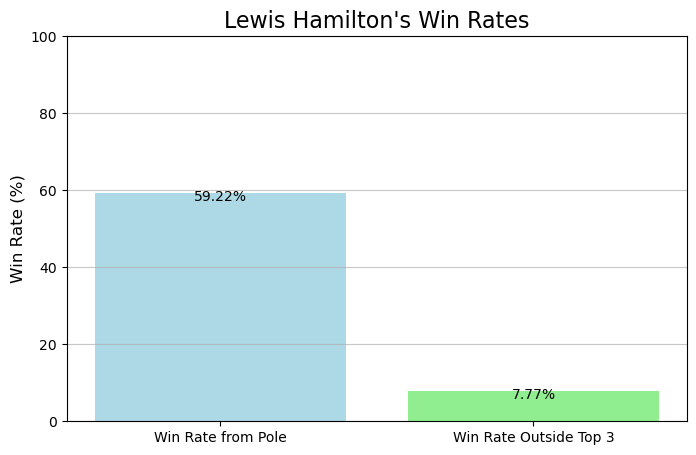

In [17]:
# 1. How often does Hamilton win races when starting from pole?
# 2. How does Hamilton perform when starting outside the top 3 on the grid?

import pandas as pd
import matplotlib.pyplot as plt


results = pd.read_csv("/Users/nikhil/Desktop/QTM151/qtm151/lectures/lecture-13/data_raw/results.csv")
drivers = pd.read_csv("/Users/nikhil/Desktop/QTM151/qtm151/lectures/lecture-13/data_raw/drivers.csv")

hamilton_id = drivers.loc[drivers['surname'] == 'Hamilton', 'driverId'].iloc[0]

hamilton_pole_starts = results[(results['driverId'] == hamilton_id) & (results['grid'] == 1)]
hamilton_pole_wins = hamilton_pole_starts[hamilton_pole_starts['positionOrder'] == 1]

# Win rate
total_pole_starts = len(hamilton_pole_starts)
wins_from_pole = len(hamilton_pole_wins)
win_rate_from_pole = wins_from_pole / total_pole_starts 

hamilton_outside_top3 = results[(results['driverId'] == hamilton_id) & (results['grid'] > 3)]

# Performance
total_outside_top3 = len(hamilton_outside_top3)
wins_outside_top3 = len(hamilton_outside_top3[hamilton_outside_top3['positionOrder'] == 1])
podiums_outside_top3 = len(hamilton_outside_top3[hamilton_outside_top3['positionOrder'].isin([1, 2, 3])])
average_finish_outside_top3 = hamilton_outside_top3['positionOrder'].mean()

# Results
print(f"Hamilton's win rate from pole: {win_rate_from_pole:.2%}")
print("Hamilton's performance starting outside the top 3:")
print(f"  - Total starts: {total_outside_top3}")
print(f"  - Wins: {wins_outside_top3}")
print(f"  - Podium finishes: {podiums_outside_top3}")
print(f"  - Average finish: {average_finish_outside_top3:.2f}")

categories = ['Win Rate from Pole', 'Win Rate Outside Top 3']
win_rates = [59.22, 7.77]

plt.figure(figsize=(8, 5))
bars = plt.bar(categories, win_rates, color=['lightblue', 'lightgreen'])

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 2, f'{bar.get_height():.2f}%', ha='center', fontsize=10, color='black')

plt.title("Lewis Hamilton's Win Rates", fontsize=16)
plt.ylabel("Win Rate (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.7)
plt.show()

Rationale Behind the Research Questions:
The research questions focus on understanding the relationship between starting grid position and race outcomes for Lewis Hamilton, one of Formula One's most successful drivers. These questions aim to uncover how starting advantages  (pole position) and disadvantages (outside the top 3) influence his ability to secure wins and podium finishes. This analysis provides insights into the significance of qualifying performance and Hamilton's ability to overcome challenging starting positions.

Explanation of Datasets:
#1. results: Contains detailed race performance data for drivers, such as starting grid position (grid), finishing position (positionOrder), and points scored.
#2. drivers: Provides metadata about drivers, including their unique driverId, name, and nationality.
#3. races: Contains information about each race, such as the season, race name, and date. By combining these tables,  we gained a comprehensive view of race results, driver details, and race metadata from 1950 to 2021.

Data Cleaning:
Rows with missing values in critical columns (e.g., grid, positionOrder) were dropped. Duplicate rows were removed to avoid redundancy. Data types of numerical columns were validated and converted where necessary (e.g., grid and positionOrder to integers). These help ensure that our analysis is both accurate and reliable.

Plotting:
A chart displaying win rates from pole and outside the top 3 highlighted the stark difference in success rates Additional visualizations provided insights into the number of podium finishes and average finishing positions. The plots emphasized the importance of starting position in Formula One and showcased Hamilton's resilience when starting outside the top 3.

Result:
The results reveal that Lewis Hamilton's performance is highly influenced by his starting position. He has a 59.22% win rate when starting from pole, but his win rate drops significantly to 7.77% when starting outside the top 3. Despite this, Hamilton has had a high number of podium finishes (33) even from challenging starting positions. These findings highlight the importance of qualifying performance, as starting from pole position provides a significant strategic advantage. On the other hand, starting outside the top 3 often requires more skill, luck, and strategy to secure strong results.